# Object Detection with SSD
### Here we demostrate detection on example images using SSD with PyTorch

In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import torch
import torch.nn as nn
import torch.backends.cudnn as cudnn
from torch.autograd import Variable
import numpy as np
import cv2
if torch.cuda.is_available():
    torch.set_default_tensor_type('torch.cuda.FloatTensor')

from ssd import build_ssd

## Build SSD512 in Test Phase
1. Build the architecture, specifyingsize of the input image (512),
    and number of object classes to score (12 for VisDrone dataset)
2. Next we load pretrained weights on the VisDrone trainval dataset  

In [2]:
net = build_ssd('test', 512, 12)    # initialize SSD512, num_class=12
net.load_weights('../weights/VisDrone2018_512.pth')

Building SSD_512
vgg layers----------
[0] Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
[1] ReLU(inplace)
[2] Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
[3] ReLU(inplace)
[4] MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
[5] Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
[6] ReLU(inplace)
[7] Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
[8] ReLU(inplace)
[9] MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
[10] Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
[11] ReLU(inplace)
[12] Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
[13] ReLU(inplace)
[14] Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
[15] ReLU(inplace)
[16] MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=True)
[17] Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
[18] ReLU(inplace)
[19

## Load Image 
### Here we just load a sample image from the VisDrone2018 dataset 

In [5]:
from data import DRONE_CLASSES as labels
%matplotlib inline
from matplotlib import pyplot as plt

seqpath='/media/mk/本地磁盘/Datasets/UAV/UAV123/data_seq/UAV123/car5/'
img_size=(1000,562)
video_dir='/home/mk/Desktop/' + seqpath.split('/')[-2] + '.avi'
print(video_dir)
fps = 30 
fourcc = cv2.VideoWriter_fourcc('M','J','P','G') #opencv3.0
videoWriter = cv2.VideoWriter(video_dir, fourcc, fps, img_size)
idx=0
# totallen=len(os.listdir(rootpath))
# for imgidx in range(totallen):
#     print(imgidx)
#     frame=cv2.imread(os.path.join(rootpath, str(imgidx)+'.JPEG'))
for item in sorted(os.listdir(seqpath)):
    image=cv2.imread(os.path.join(seqpath, item))
    origin=np.copy(image)
    imgheight, imgwidth, _ = image.shape
    image=cv2.resize(image, (512,512)).astype(np.float32)
    image-=(119.0, 122.0, 116.0) # 数据集的均值
    image=image.astype(np.float32)
    image=image[:,:,::-1].copy()
    image=torch.from_numpy(image).permute(2,0,1)
    print(item)
    xx = Variable(image.unsqueeze(0))     # warp tensor in Variable
    if torch.cuda.is_available():
        xx = xx.cuda()
    y = net(xx)

    top_k=10
    detections = y.data
    # scale each detection back up to the image
    scale = torch.Tensor((imgwidth, imgheight)).repeat(2)
    colors = plt.cm.hsv(np.linspace(0, 1, 12)).tolist() # 修改num_class=12
    font = cv2.FONT_HERSHEY_SIMPLEX
    for i in range(detections.size(1)):
        j = 0
        while detections[0,i,j,0] >= 0.6:
            score = detections[0,i,j,0]
            label_name = labels[i-1]
            display_txt = '%s: %.2f'%(label_name, score)
            pt = (detections[0,i,j,1:]*scale).cpu().numpy()
            # coords = (pt[0], pt[1]), pt[2]-pt[0]+1, pt[3]-pt[1]+1
            color = colors[i]
            origin=cv2.rectangle(origin, (int(pt[0]), int(pt[1])), (int(pt[2]), int(pt[3])), (255,255,0), 4)
            origin=cv2.putText(origin, label_name, (int(pt[0]), int(pt[1])-1), font, 1, (0,0,255), 2)
            # currentAxis.add_patch(plt.Rectangle(*coords, fill=False, edgecolor=color, linewidth=2))
            # currentAxis.text(pt[0], pt[1], display_txt, bbox={'facecolor':color, 'alpha':0.5})
            
            j+=1
    # print('frame: '+str(idx))
    idx+=1
    origin=cv2.resize(origin, (1000,562))
    videoWriter.write(origin)
videoWriter.release()
print('finish: '+str(idx))

#         x.append(item)
# print('num of frames: '+str(len(imagelist)))

/home/mk/Desktop/car5.avi
000001.jpg
000002.jpg
000003.jpg
000004.jpg
000005.jpg
000006.jpg
000007.jpg
000008.jpg
000009.jpg
000010.jpg
000011.jpg
000012.jpg
000013.jpg
000014.jpg
000015.jpg
000016.jpg
000017.jpg
000018.jpg
000019.jpg
000020.jpg
000021.jpg
000022.jpg
000023.jpg
000024.jpg
000025.jpg
000026.jpg
000027.jpg
000028.jpg
000029.jpg
000030.jpg
000031.jpg
000032.jpg
000033.jpg
000034.jpg
000035.jpg
000036.jpg
000037.jpg
000038.jpg
000039.jpg
000040.jpg
000041.jpg
000042.jpg
000043.jpg
000044.jpg
000045.jpg
000046.jpg
000047.jpg
000048.jpg
000049.jpg
000050.jpg
000051.jpg
000052.jpg
000053.jpg
000054.jpg
000055.jpg
000056.jpg
000057.jpg
000058.jpg
000059.jpg
000060.jpg
000061.jpg
000062.jpg
000063.jpg
000064.jpg
000065.jpg
000066.jpg
000067.jpg
000068.jpg
000069.jpg
000070.jpg
000071.jpg
000072.jpg
000073.jpg
000074.jpg
000075.jpg
000076.jpg
000077.jpg
000078.jpg
000079.jpg
000080.jpg
000081.jpg
000082.jpg
000083.jpg
000084.jpg
000085.jpg
000086.jpg
000087.jpg
000088.jpg
000089

000744.jpg
000745.jpg
finish: 745


## Pre-process the input.  
#### Using the torchvision package, we can create a Compose of multiple built-in transorm ops to apply 
For SSD, at test time we use a custom BaseTransform callable to
resize our image to 300x300, subtract the dataset's mean rgb values, 
and swap the color channels for input to SSD300.

In [5]:
batch=16
while imagelist != None:
    if len(imagelist)>batch:
        inputlist=imagelist[:16,:,:,:]
        imagelist=imagelist[16:,:,:,:]
    else:
        inputlist=imagelist
        imagelist=None
    
    x=[]
    for item in inputlist:
        item=cv2.resize(item, (512,512)).astype(np.float32)
        item-=(119.0, 122.0, 116.0) # 数据集的均值
        item=item.astype(np.float32)
        item=item[:,:,::-1].copy()
        item=torch.from_numpy(item).permute(2,0,1)
        x.append(item)
        
    xx = Variable(x.unsqueeze(0))     # warp tensor in Variable
    if torch.cuda.is_available():
        xx = xx.cuda()
    y = net(xx)
    
    top_k=10


    detections = y.data
    # scale each detection back up to the image
    scale = torch.Tensor(rgb_image.shape[1::-1]).repeat(2)
    colors = plt.cm.hsv(np.linspace(0, 1, 12)).tolist() # 修改num_class=12
    for i in range(detections.size(1)):
        j = 0
        while detections[0,i,j,0] >= 0.6:
            score = detections[0,i,j,0]
            label_name = labels[i-1]
            display_txt = '%s: %.2f'%(label_name, score)
            pt = (detections[0,i,j,1:]*scale).cpu().numpy()
            # coords = (pt[0], pt[1]), pt[2]-pt[0]+1, pt[3]-pt[1]+1
            color = colors[i]
            origin=cv2.rectangle(origin, (int(pt[0]), int(pt[1])), (int(pt[2]), int(pt[3])), (255,255,0), 4)
            origin=cv2.putText(origin, DRONE_CLASSES[int(pt[4])-1], (int(pt[0]), int(pt[1])-1), font, 1, (0,0,255), 2)
            # currentAxis.add_patch(plt.Rectangle(*coords, fill=False, edgecolor=color, linewidth=2))
            # currentAxis.text(pt[0], pt[1], display_txt, bbox={'facecolor':color, 'alpha':0.5})
            j+=1
            cv2.imshow()
            cv2.withKey()
    
    

TypeError: list indices must be integers or slices, not tuple

## SSD Forward Pass
### Now just wrap the image in a Variable so it is recognized by PyTorch autograd

In [9]:
xx = Variable(x.unsqueeze(0))     # warp tensor in Variable
if torch.cuda.is_available():
    xx = xx.cuda()
y = net(xx)

## Parse the Detections and View Results
Filter outputs with confidence scores lower than a threshold 
Here we choose 60% 

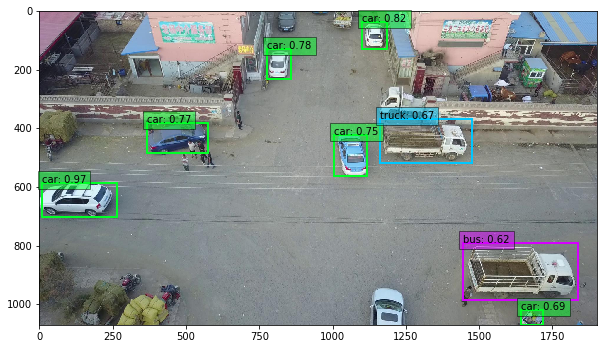